In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# Check the Frequency of Variable
from collections import Counter

In [2]:
# 한글 폰트 깨지지 않게 하기
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv("../../01.files/02.Bigsata_analysis/통신고객이탈.csv")
raw_data

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Churned,K413330,M,19,Play 100,SOP10,Med,17.40,12,60,100.8,27,59.4,127,628.2
926,Churned,K413410,F,59,Play 100,SOP20,Med,17.37,15,82,130.2,12,25.8,357,650.7
927,Churned,K415490,F,33,Play 300,S50,Med,44.93,12,174,286.2,25,67.0,596,1039.0
928,Churned,K415880,F,25,Play 300,S50,Med,40.43,14,315,552.0,0,0.0,609,1188.3


In [4]:
raw_data.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [5]:
x_data = raw_data.drop(['CHURN','CUSTOMER_ID'], axis = 1)
y_data = raw_data['CHURN'].map({'Active':0, 'Churned':1})

In [6]:
# make scaled data

df_raw_x_num = x_data.select_dtypes(exclude = "object")
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [10]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = x_data.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환델 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_scaled = df_x_scaled.join(df_x_dummy)
df_x = df_raw_x_num.join(df_x_dummy)
reg_data = df_x_scaled.join(df_raw_x_char)
reg_data = reg_data.join(y_data)

display(df_x_scaled.head())
display(df_x.head())
display(reg_data.head())

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,0,...,0,0,0,0,0,0,1,0,0,0
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,0,...,0,0,0,0,0,0,1,0,0,0
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,1,...,0,0,0,0,0,0,1,0,0,0


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND,CHURN
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,1,...,0,1,0,0,0,F,CAT 100,ASAD170,Med,0
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,0,...,0,1,0,0,0,M,CAT 100,S50,Med,0
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,0,...,0,1,0,0,0,M,CAT 100,ASAD170,Med,0
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,0,...,0,1,0,0,0,M,CAT 100,ASAD170,Med,0
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,1,...,0,1,0,0,0,F,CAT 100,S50,Med,0


In [12]:
# 변환된 설명변수 데이터 사용:df_x_converted scaled
scaled_df_train_x, scaled_df_test_x, scaled_df_train_y, scaled_df_test_y = train_test_split(df_x_scaled, y_data,
                                                                                            test_size = 0.3, 
                                                                                            random_state = 1234)
tree_df_train_x, tree_df_test_x, tree_df_train_y, tree_df_test_y = train_test_split(df_x, y_data, 
                                                                                    test_size = 0.3, 
                                                                                    random_state = 777)

In [13]:
# formula 텍스트 만드는 함수

def make_formula_txt(column_list, y_value):
    y_index = column_list.index(y_value)
    formula_text = column_list[y_index] + " ~ "
    x_list = column_list.copy()
    x_list.remove(y_value)
    #print(x_list)
    for i in range(1, len(x_list)):
        formula_text += x_list[i] + "+"
    formula_text = formula_text[:-1]
    formula_text
    
    return formula_text

In [14]:
# 분석 모델 리스트
model = ["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

In [15]:
# 최종모델
dt_final = DecisionTreeClassifier(max_depth=5, min_samples_split=16, min_samples_leaf=5, random_state=777)
dt_final.fit(tree_df_train_x, tree_df_train_y)

# 정확도
train_accuracy.append(dt_final.score(tree_df_train_x, tree_df_train_y))
test_accuracy.append(dt_final.score(tree_df_test_x, tree_df_test_y))

# 예측값
y_prob_1 = dt_final.predict_proba(tree_df_test_x)[:, 1]  # 1 발생 확률
y_pred = dt_final.predict(tree_df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(tree_df_test_y, y_pred)))
print(classification_report(tree_df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(tree_df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[218   5]
 [ 31  25]]
              precision    recall  f1-score   support

           0      0.876     0.978     0.924       223
           1      0.833     0.446     0.581        56

    accuracy                          0.871       279
   macro avg      0.854     0.712     0.753       279
weighted avg      0.867     0.871     0.855       279



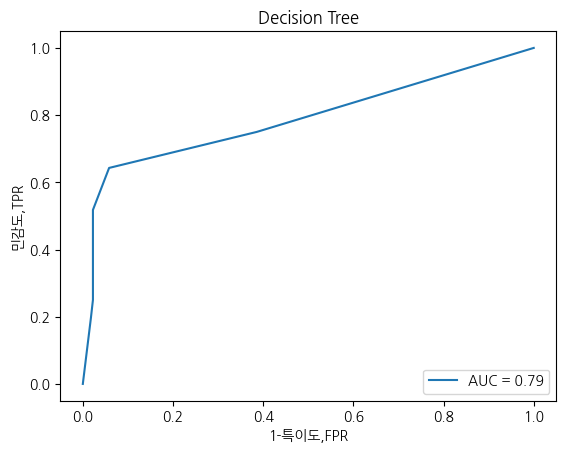

In [16]:
plt.title("Decision Tree")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [17]:
# precision, recall score
model_precision.append(precision_score(tree_df_test_y, y_pred))
model_recall.append(recall_score(tree_df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(tree_df_test_y, y_pred))
model_f1_score

[0.5813953488372092]

In [18]:
# 최종모델
rf_final = RandomForestClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=8, n_estimators=120, random_state=1234)
rf_final.fit(tree_df_train_x, tree_df_train_y)

# 정확도
train_accuracy.append(dt_final.score(tree_df_train_x, tree_df_train_y))
test_accuracy.append(dt_final.score(tree_df_test_x, tree_df_test_y))

# 예측값
y_prob_1 = dt_final.predict_proba(tree_df_test_x)[:, 1]  # 1 발생 확률
y_pred = dt_final.predict(tree_df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(tree_df_test_y, y_pred)))
print(classification_report(tree_df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(tree_df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[218   5]
 [ 31  25]]
              precision    recall  f1-score   support

           0      0.876     0.978     0.924       223
           1      0.833     0.446     0.581        56

    accuracy                          0.871       279
   macro avg      0.854     0.712     0.753       279
weighted avg      0.867     0.871     0.855       279



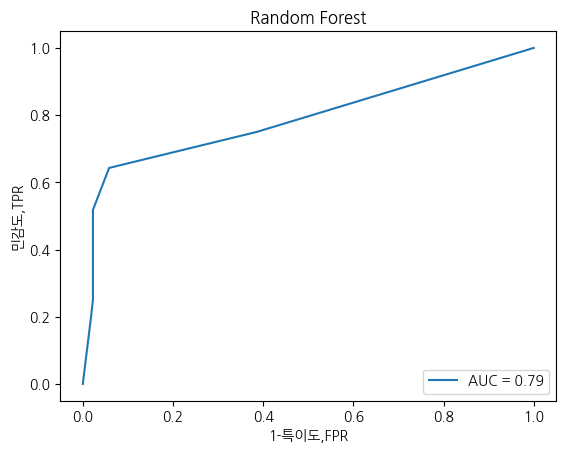

In [19]:
plt.title("Random Forest")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [20]:
# precision, recall score
model_precision.append(precision_score(tree_df_test_y, y_pred))
model_recall.append(recall_score(tree_df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(tree_df_test_y, y_pred))
model_f1_score

[0.5813953488372092, 0.5813953488372092]

In [21]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=8, max_depth=3, n_estimators=80,
			 learning_rate=0.05, random_state=1234)
gb_final.fit(tree_df_train_x, tree_df_train_y)

# 정확도
train_accuracy.append(gb_final.score(tree_df_train_x, tree_df_train_y))
test_accuracy.append(gb_final.score(tree_df_test_x, tree_df_test_y))

# 예측값
y_prob_1 = gb_final.predict_proba(tree_df_test_x)[:, 1]  # 1 발생 확률
y_pred = gb_final.predict(tree_df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(tree_df_test_y, y_pred)),"\n")
print(classification_report(tree_df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(tree_df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[219   4]
 [ 29  27]] 

              precision    recall  f1-score   support

           0      0.883     0.982     0.930       223
           1      0.871     0.482     0.621        56

    accuracy                          0.882       279
   macro avg      0.877     0.732     0.775       279
weighted avg      0.881     0.882     0.868       279



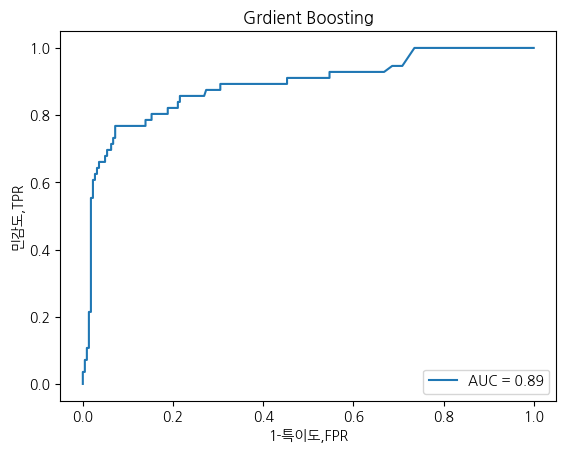

In [22]:
plt.title("Grdient Boosting")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [23]:
# precision, recall score
model_precision.append(precision_score(tree_df_test_y, y_pred))
model_recall.append(recall_score(tree_df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(tree_df_test_y, y_pred))
model_f1_score

[0.5813953488372092, 0.5813953488372092, 0.6206896551724138]

In [28]:
scaled_df_test_x

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
530,0.045701,1.516865,-0.479163,-0.390627,1.586419,-0.993897,-1.347031,-0.501461,1.359175,1,...,0,0,0,0,0,0,0,1,0,0
534,-0.106910,1.396972,1.806077,-0.527559,1.334958,-0.494667,-0.080793,-0.537490,1.389907,0,...,0,0,0,0,0,0,0,1,0,0
699,0.503536,-0.213125,2.091732,-0.589400,-0.888608,0.129370,-0.015015,-0.045086,-0.576984,1,...,0,0,0,1,0,0,1,0,0,0
641,-0.793662,0.682549,-0.479163,1.954900,0.795947,2.188694,1.218334,1.524200,0.788425,0,...,0,0,0,0,0,0,0,1,0,0
319,-0.869967,-1.251966,-0.764818,-0.752836,-1.173830,-0.369860,-0.689245,-0.949828,-1.057182,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.800733,-0.177862,-0.479163,-0.183019,1.814597,-0.931493,-0.031459,-0.413388,1.563876,0,...,0,0,0,0,0,0,0,1,0,0
652,0.656147,1.262974,-0.193508,0.002503,1.361734,1.127830,1.750044,-0.089123,1.385334,1,...,0,0,0,1,0,0,0,1,0,0
532,1.113982,-1.221640,-0.764818,-0.735167,0.005475,-0.057841,-0.508354,-0.597539,0.089805,1,...,0,0,0,1,0,0,1,0,0,0
36,-0.183216,0.409615,-0.479163,3.257970,2.633009,1.065427,0.363212,2.693158,2.258654,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(22, 22), activation="logistic", batch_size= 80, solver="adam", random_state = 1234)
nn_final.fit(scaled_df_train_x, scaled_df_train_y)

# 정확도
train_accuracy.append(nn_final.score(scaled_df_train_x, scaled_df_train_y))
test_accuracy.append(nn_final.score(scaled_df_test_x, scaled_df_test_y))

# 예측값
y_prob_1 = nn_final.predict_proba(scaled_df_test_x)[:, 1]  # 1 발생 확률
y_pred = nn_final.predict(scaled_df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(scaled_df_test_y, y_pred)),"\n")
print(classification_report(scaled_df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(scaled_df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[226   9]
 [ 15  29]] 

              precision    recall  f1-score   support

           0      0.938     0.962     0.950       235
           1      0.763     0.659     0.707        44

    accuracy                          0.914       279
   macro avg      0.850     0.810     0.828       279
weighted avg      0.910     0.914     0.911       279



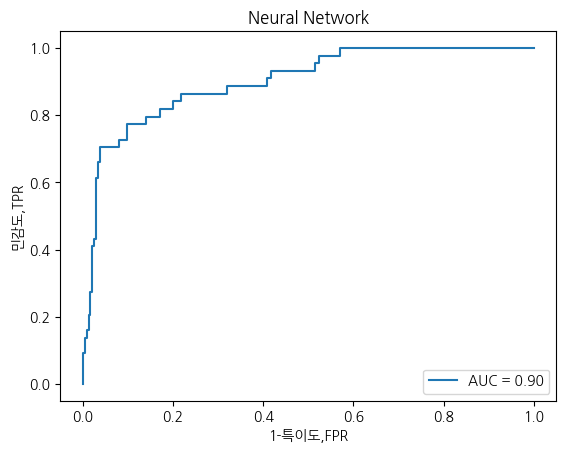

In [30]:
plt.title("Neural Network")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [32]:
# precision, recall score
model_precision.append(precision_score(scaled_df_test_y, y_pred))
model_recall.append(recall_score(scaled_df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(scaled_df_test_y, y_pred))
model_f1_score

[0.5813953488372092,
 0.5813953488372092,
 0.6206896551724138,
 0.7073170731707317]

In [33]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.914,0.871,0.789,0.833,0.446,0.581
RandomForest,0.914,0.871,0.789,0.833,0.446,0.581
GradientBoosting,0.934,0.882,0.887,0.871,0.482,0.621
NeuralNet,0.916,0.914,0.900,0.763,0.659,0.707


In [34]:
df_eval.T

,DecisionTree,RandomForest,GradientBoosting,NeuralNet
TrainAccuracy,0.913978,0.913978,0.933948,0.915515
TestAccuracy,0.870968,0.870968,0.881720,0.913978
AUC,0.789118,0.789118,0.887292,0.900290
Precision,0.833333,0.833333,0.870968,0.763158
Recall,0.446429,0.446429,0.482143,0.659091
F1Score,0.581395,0.581395,0.620690,0.707317


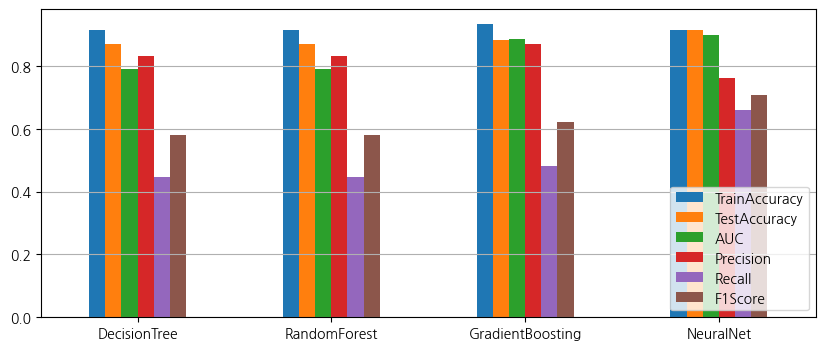

In [35]:
# 모델별 평가 지표 확인
df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right"); plt.grid(axis = "y")

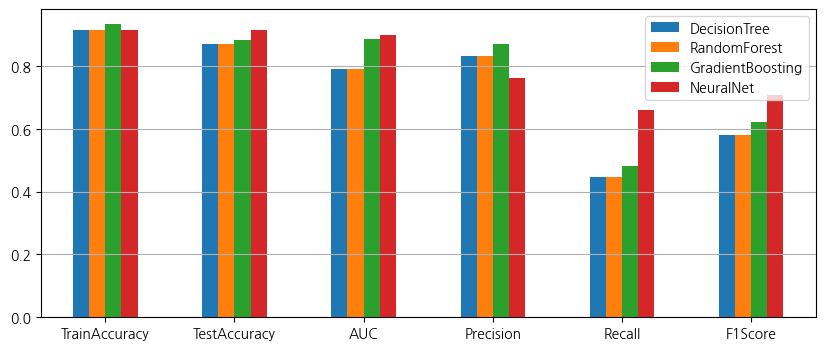

In [36]:
# Data 전치하여 지표 기준으로 모델 성능 평가 
df_eval.T.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="upper right"); plt.grid(axis = "y")

전체적인 성능으로 보았을때, AUC와 Recall, F1-score에서 인공신경망이 높은 성능을 보이고 있다.        
이는 양성을 예측하는데에 다른 모델에 비해 탁월한 성능을 보였다는 의미를 내포한다.